In [56]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [72]:
iris = pd.read_csv('iris.csv', names=['sepal-length','sepal-width','petal-length','petal-width','class'])
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
x = iris.iloc[:,:-1]
y = iris.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [8]:
for i in range(1,10):
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 42, max_depth = i)
    clf = clf.fit(x_train, y_train)
    print 'max_depth:', i, 'accuracy_score:', accuracy_score(clf.predict(x_test), y_test)

max_depth: 1 accuracy_score: 0.711111111111
max_depth: 2 accuracy_score: 0.977777777778
max_depth: 3 accuracy_score: 0.977777777778
max_depth: 4 accuracy_score: 1.0
max_depth: 5 accuracy_score: 0.977777777778
max_depth: 6 accuracy_score: 0.977777777778
max_depth: 7 accuracy_score: 0.977777777778
max_depth: 8 accuracy_score: 0.977777777778
max_depth: 9 accuracy_score: 0.977777777778


#Choosing max_depth = 4 gives the highest accuracy score

In [9]:
clf = tree.DecisionTreeClassifier(random_state = 42, max_depth = 4)
clf = clf.fit(x_train, y_train)

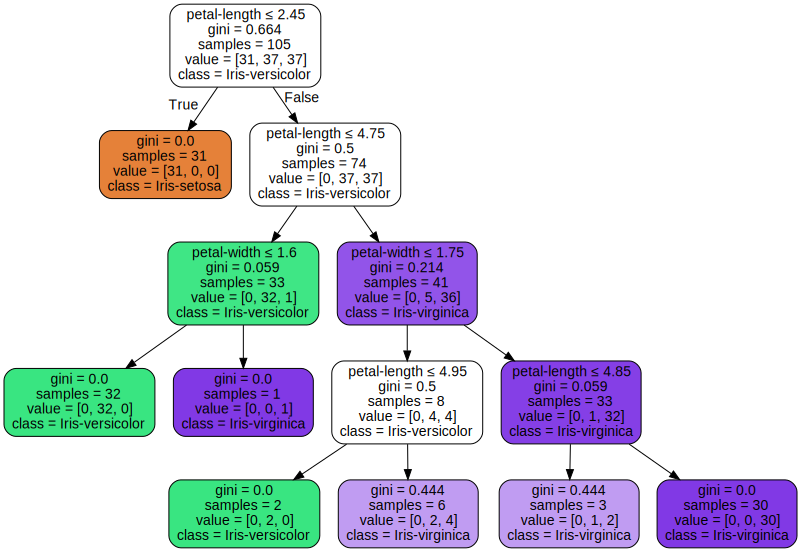

In [10]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.columns[:-1],  
                         class_names=np.unique(iris['class'].values),  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [13]:
wine = pd.read_csv('wine.csv', names=['Wine', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'])
wine.head()

,Wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [14]:
x = np.array(wine.iloc[:, 1:])
y = np.array(wine.iloc[:, 0])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

Text(0.5,1,u'Thong ITITIU15001')

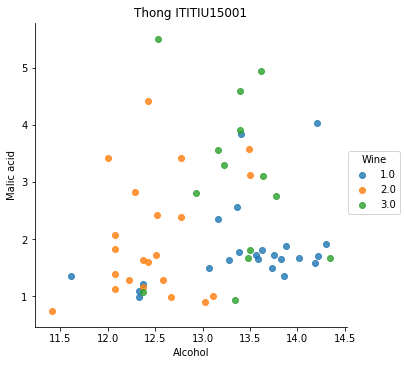

In [67]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
temp = pd.DataFrame(np.hstack((np.reshape(knn.predict(x_test), (59,1)), x_test)), columns=['Wine', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'])
sb.lmplot(x = 'Alcohol', y = 'Malic acid', hue = 'Wine', data = temp, fit_reg = False)
plt.title('Thong ITITIU15001')

#Scatterplot for n = 1

Text(0.5,1,u'Thong ITITIU15001')

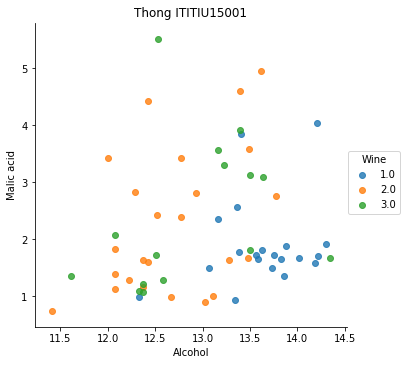

In [68]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
temp = pd.DataFrame(np.hstack((np.reshape(knn.predict(x_test), (59,1)), x_test)), columns=['Wine', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'])
sb.lmplot(x = 'Alcohol', y = 'Malic acid', hue = 'Wine', data = temp, fit_reg = False)
plt.title('Thong ITITIU15001')

#Scatterplot for n = 5

Text(0.5,1,u'Thong ITITIU15001')

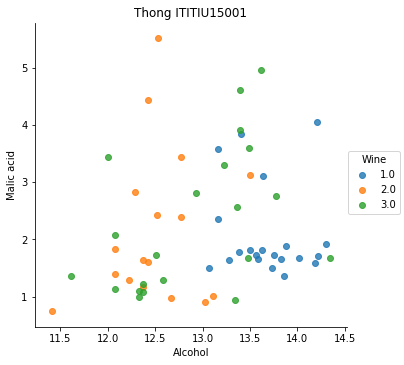

In [66]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train, y_train)
temp = pd.DataFrame(np.hstack((np.reshape(knn.predict(x_test), (59,1)), x_test)), columns=['Wine', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'])
sb.lmplot(x = 'Alcohol', y = 'Malic acid', hue = 'Wine', data = temp, fit_reg = False)
plt.title('Thong ITITIU15001')

#Scatterplot for n = 20

In [69]:
for i in (1,5,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    print 'n =', i, 'accuracy_score =', accuracy_score(y_test, knn.predict(x_test))

n = 1 accuracy_score = 0.779661016949
n = 5 accuracy_score = 0.677966101695
n = 20 accuracy_score = 0.762711864407


#n = 1 gives the highest accuracy score

In [79]:
uber = pd.read_csv('uber.csv').iloc[:,1:]
uber.head()

,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date
0,Strark,ios web,Paid,1/2/16,NaN,NaN,NaN,NaN,NaN,NaN
1,Strark,windows,Paid,1/21/16,NaN,NaN,NaN,NaN,NaN,NaN
2,Wrouver,windows,Organic,1/11/16,1/11/16,NaN,NaN,NaN,NaN,NaN
3,Berton,android web,Referral,1/29/16,2/3/16,2/3/16,Toyota,Corolla,2016.0,2/3/16
4,Strark,android web,Referral,1/10/16,1/25/16,1/26/16,Hyundai,Sonata,2016.0,NaN
